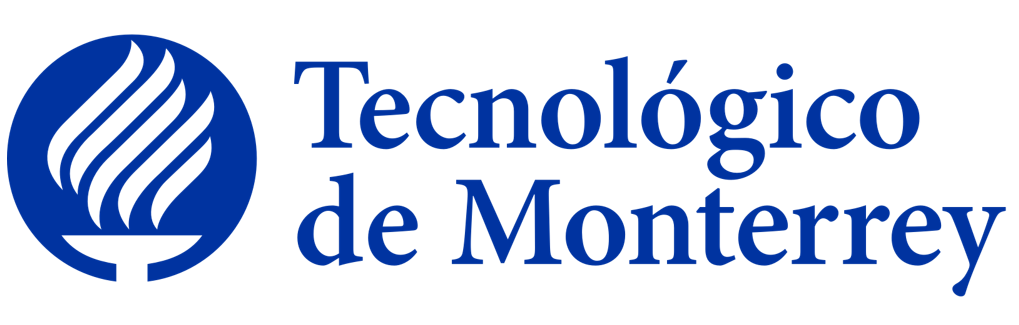


<p class=MsoNormal align=center style='margin-bottom:0in;text-align:center;
line-height:normal;background:white'><b><span lang=ES-MX style='font-size:21.5pt;
font-family:"Arial",sans-serif;color:#666666'>MR4010 Navegación Autónoma</span></b></p>

<p class=paragraph style='margin:0in;text-align:justify;vertical-align:baseline'><span
lang=ES-MX style='font-size:11.0pt;font-family:"Arial",sans-serif;color:#5A5A5A'>&nbsp;</span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span class=normaltextrun><b><span lang=ES-MX style='font-size:16.0pt;
font-family:"Arial",sans-serif;color:#262626'>Proyecto final</span></b></span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span class=normaltextrun><span lang=ES-MX style='font-family:"Arial",sans-serif;
color:#262626'>&nbsp;</span></span></p>

<p class=paragraph style='margin:0in;text-align:justify;vertical-align:baseline'><span
lang=ES style='font-size:11.0pt;font-family:"Arial",sans-serif;color:#262626'>&nbsp;</span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'>Equipo 8:</span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'>&nbsp;</span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'><a
href="https://experiencia21.tec.mx/groups/1056540/users/362468"><span
style='color:#2D3B45;text-decoration:none'>Marcela Alejandra Rosales Jimenes - A01032022</span></a>
</span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'><a
href="https://experiencia21.tec.mx/groups/1056540/users/112101"
style='color:var(--ic-link-color)'><span style='color:#2D3B45;text-decoration:
none'>Sergio Omar Esparza Hernández - A01794338</span></a> </span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'><a
href="https://experiencia21.tec.mx/groups/1056540/users/329770"
style='color:var(--ic-link-color)'><span style='color:#2D3B45;text-decoration:
none'>Ernesto Nicanor Santillán Guerrero - A01793675</span></a> </span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'><a
href="https://experiencia21.tec.mx/groups/1056540/users/329663"
style='color:var(--ic-link-color)'><span style='color:#2D3B45;text-decoration:
none'>Cecilia Acevedo Rodríguez - A01793953</span></a> </span></p>

<p class=paragraph style='margin:0in;text-align:justify;vertical-align:baseline'><span
lang=ES-MX style='font-size:11.0pt;font-family:"Arial",sans-serif;color:#2D3B45;
background:white'>&nbsp;</span></p>

<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'>Profesor Titular: Dr. David Antonio Torres </span></p>
<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'>Profesor asistente: Maricarmen Vázquez Rojí</span></p>
<p class=paragraph align=center style='margin:0in;text-align:center;vertical-align:
baseline'><span lang=ES-MX style='font-size:10.5pt;font-family:"Arial",sans-serif;
color:#2D3B45;background:white'>Entrega: 25 de junio de 2023</span></p>

# Proyecto Final

El proyecto final consiste en utilizar el simulador de Udacity y usar la técnica de behavioral cloning:para entrenar un vehículo autónomo.

In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Model

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import random

## Configurar el GPU en Google Colab

En Google Colab debemos configurar el GPU en Entorno de ejecución, Cambiar tipo de entorno de ejecución y finalmente elegir un GPU.

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tf.device(device_name)

Found GPU at: /device:GPU:0


## Generación de Datos

Para obtener los datos necesarios para el entrenamiento utilizamos el simulador de Udacity en modo de "Training". Este modo nos permite interactuar con el simulador directamente, y por su parte el simulador captura las imágenes y las acciones que nosotros realizamos (como el ángulo de giro, velocidad, etc). Esto es necesario para poder hacer la técnica de behavioral cloning para poder entrenar el modelo.

Posteriormente cargamos los datos obtenidos del entrenamiento a un repositorio en github para poder clonar esos datos a Google colab.

In [3]:
! git clone https://github.com/marcelarosalesj-education/mna.navegacion-autonoma.datos-proyecto-final

Cloning into 'mna.navegacion-autonoma.datos-proyecto-final'...
remote: Enumerating objects: 23784, done.
remote: Counting objects: 100% (6161/6161), done.
remote: Compressing objects: 100% (6159/6159), done.
remote: Total 23784 (delta 0), reused 6159 (delta 0), pack-reused 17623
Receiving objects: 100% (23784/23784), 305.94 MiB | 36.44 MiB/s, done.
Updating files: 100% (23777/23777), done.


## Preprocesamiento de datos

En esta sección cargamos en un Dataframe de pandas los datos de `driving_log.csv`

Como los datos fueron capturados en nuestras computadoras personales es neceseario cambiar las rutas para que funcionen en colab.



In [4]:
! sed -i 's/\/home\/marcela\/Downloads\/simulator-linux\/data/\/content\/mna.navegacion-autonoma.datos-proyecto-final/g' "/content/mna.navegacion-autonoma.datos-proyecto-final/driving_log.csv"

In [5]:
path = "/content/mna.navegacion-autonoma.datos-proyecto-final/driving_log.csv"

Seleccionamos las columnas de interés para el entrenamiento.

In [6]:
df = pd.read_csv(path, names=["Center", "Left", "Right", "Angle", "Accel", "Brake", "Speed"])
df.head()

,Center,Left,Right,Angle,Accel,Brake,Speed
0,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyec...,/content/mna.navegacion-autonoma.datos-proyec...,0.0,0.0,0.0,0.000078
1,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyec...,/content/mna.navegacion-autonoma.datos-proyec...,0.0,0.0,0.0,0.000079
2,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyec...,/content/mna.navegacion-autonoma.datos-proyec...,0.0,0.0,0.0,0.000082
3,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyec...,/content/mna.navegacion-autonoma.datos-proyec...,0.0,0.0,0.0,0.000079
4,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyec...,/content/mna.navegacion-autonoma.datos-proyec...,0.0,0.0,0.0,0.000079


In [7]:
# Función lambda para remover espacios que tienen las rutas de las imágenes de la izquierda y derecha
remove_spaces = lambda path:path.strip()
#Se aplica la función a las columnas del dataframe
df['Left'] = df['Left'].apply(remove_spaces)
df['Right'] = df['Right'].apply(remove_spaces)

Para el entrenamiento de nuestro modelo sólo vamos a utilizar datos del ángulo, por lo que podemos hacer drop de las columnas `Accel`, `Brake`, `Speed`.

In [8]:
df.drop(labels=["Accel", "Brake", "Speed"], axis=1, inplace=True)
df.head()

,Center,Left,Right,Angle
0,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,0.0
1,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,0.0
2,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,0.0
3,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,0.0
4,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,/content/mna.navegacion-autonoma.datos-proyect...,0.0


In [9]:
print(f"El tamaño de nuestro dataset es: {len(df)}")

El tamaño de nuestro dataset es: 7925


## Visualización de la distribución de nuestros datos

Podemos ver que la mayoría de nuestros datos tienen un ángulo 0 ya que no era necesario utilizar otro ángulo para navegar la pista que utilizamos para entrenar. Un ángulo de 0 grados significa que ibamos derecho y no había curvas.

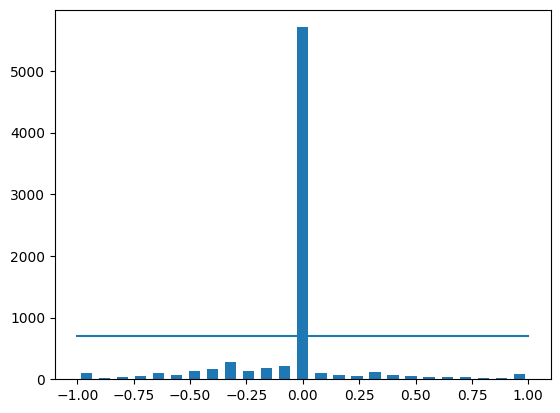

In [10]:
num_bins = 25
samples_per_bin = 700

hist, bins = np.histogram(df['Angle'], num_bins)
center = (bins[:-1]+bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df['Angle']), np.max(df['Angle'])), (samples_per_bin, samples_per_bin));

Decidimos quitar varias muestras que tenían un ángulo de 0 grados ya que el modelo no estaba aprendiendo a manejar las curvas lo suficiente. Nos dimos cuenta de este problema al probar la pista desconocida en modo autónomo.

total data: 7925
removed: 5009
remaining: 2916


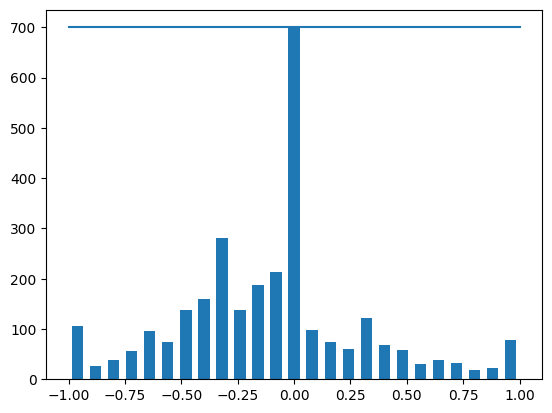

In [11]:
print('total data:', len(df))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(df['Angle'])):
        if df['Angle'][i] >= bins[j] and df['Angle'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))
df.drop(df.index[remove_list], inplace=True)
print('remaining:', len(df))

hist, _ = np.histogram(df['Angle'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df['Angle']), np.max(df['Angle'])), (samples_per_bin, samples_per_bin));

## Data augmentation

Debido a que la pista de entrenamiento tiene más secciones de la pista curvas que rectas es necesario hacer data augmentation de los tramos curvos.

In [12]:
# Escala la imagen un porcentaje de su tamaño original
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

# Traslada la imagen en los ejes de un -10% a un 10%, se obtiene un resultado diferente con cada ejecución
def pan(image):
    pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

# Multiplica las imágenes por un valor aleatorio dentro del intervalo especificado, haciéndolas más oscuras o más brillosas
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

# Voltea las imágenes con respecto al eje vertical y se obtiene el negativo del ángulo
def img_random_flip(image, steering_angle):
    image = cv.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

In [13]:
# Función para realizar data augmentation a las imágenes del dataset
def random_augment(img, steering_angle):
    if np.random.rand() < 0.5:
        img = pan(img)
    if np.random.rand() < 0.5:
        img = zoom(img)
    if np.random.rand() < 0.5:
        img = img_random_brightness(img)

    img, steering_angle = img_random_flip(img, steering_angle)

    return img, steering_angle

In [14]:
# Función para preprocesar las imágenes para alimentar al modelo
def image_for_training(img):
    img = img[65:130,:,:]
    img = cv.cvtColor(img, cv.COLOR_BGR2YUV)
    img = cv.GaussianBlur(img, (3, 3), 0)
    training_img = cv.resize(img, (200,66), interpolation=cv.INTER_LINEAR)
    training_img = training_img/255
    return training_img

In [15]:
# Obtención de las rutas de las imágenes de la cámara del centro
images_c = list(df["Center"])
images = images_c

In [17]:
# Obtención de los datos de ángulo de giro para cada imagen del dataset
angles_c = list(df["Angle"])
angles = angles_c

Se cargan las imágenes y se pasan a la función `random_augment`. Esta función hace el data augmentation aplicando una operación de **flip** a la imagen y al menos una de las siguientes operaciones: **zoom**, **pan**, **brightness**.

Al final de este proceso se tienen el doble de imágenes para entrenamiento.

In [18]:
# Función para cargar imágenes y aplicar preprocesamiento
data_x = list()
for path in images:
    img = cv.imread(path)
    img = image_for_training(img)
    data_x.append(img)

In [19]:
data_x_aug = list()
data_y_aug = list()
#Función para aplicar data augmentation a imágenes del dataset
for path, element in zip(images, angles):
    img = cv.imread(path)
    img, angle = random_augment(img, element)
    img = image_for_training(img)
    data_x_aug.append(img)
    data_y_aug.append(angle)

In [20]:
data_x = data_x + data_x_aug #Obtención de lista con datos de imágenes después de data augmentation
X = np.array(data_x) #Obtención del arreglo de datos de entrada para el modelo
print(f'Dimensiones de datos de entrada: {X.shape}')

Dimensiones de datos de entrada: (5832, 66, 200, 3)


In [21]:
data_y = angles + data_y_aug #Obtención de lista con datos de ángulos después de data augmentation
y = np.array(data_y) #Obtención del arreglo de datos de salida para el modelo
print(f'Dimensiones de datos de salida: {y.shape}')

Dimensiones de datos de salida: (5832,)


Así es cómo se ve una imagen aumentada.

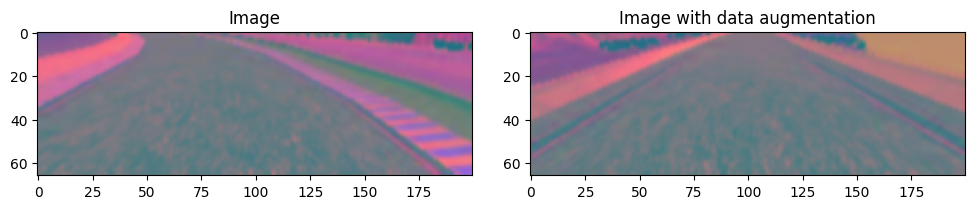

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout()

axs[0].imshow(data_x[0])
axs[0].set_title('Image')

axs[1].imshow(data_x_aug[79])
axs[1].set_title('Image with data augmentation')

plt.show()

Como estamos utilizando Google Colab los recursos de RAM que tenemos son 12.7 GB. Es necesario eliminar variables que no necesitamos para proseguir.

In [27]:
del data_x
del data_x_aug
del angles
del data_y_aug
del images_c

NameError: ignored

## Entrenamiento del modelo

Primero hacemos el split del dataset en train y test.

In [28]:
#Partición de los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

In [29]:
print(f'Dimensiones X train: {X_train.shape}')
print(f'Dimensiones X val: {X_val.shape}')
print(f'Dimensiones y train: {y_train.shape}')
print(f'Dimensiones y val: {y_val.shape}')

Dimensiones X train: (4957, 66, 200, 3)
Dimensiones X val: (875, 66, 200, 3)
Dimensiones y train: (4957,)
Dimensiones y val: (875,)


Definimos el modelo NVIDIA usando keras y realizamos el entrenamiento.

In [30]:
def nvidia_model():
    model = Sequential()
    model.add(Conv2D(24, 5, strides=(2, 2), input_shape=(66,200, 3), activation='elu'))
    model.add(Conv2D(36, 5, strides=(2, 2), activation='elu'))
    model.add(Conv2D(48, 5, strides=(2, 2), activation='elu'))
    model.add(Conv2D(64, 3, activation='elu'))

    model.add(Conv2D(64, 3, activation='elu'))

    model.add(Flatten())

    model.add(Dense(100, activation = 'elu'))
    model.add(Dropout(0.5))

    model.add(Dense(50, activation = 'elu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation = 'elu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [31]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [32]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val), epochs=10,
                    batch_size=16, verbose=1, shuffle=True)

Epoch 1/10
310/310 [==============================] - 17s 22ms/step - loss: 0.2542 - val_loss: 0.1631
Epoch 2/10
310/310 [==============================] - 6s 21ms/step - loss: 0.1872 - val_loss: 0.1577
Epoch 3/10
310/310 [==============================] - 6s 18ms/step - loss: 0.1757 - val_loss: 0.1595
Epoch 4/10
310/310 [==============================] - 4s 14ms/step - loss: 0.1744 - val_loss: 0.1656
Epoch 5/10
310/310 [==============================] - 7s 21ms/step - loss: 0.1659 - val_loss: 0.1578
Epoch 6/10
310/310 [==============================] - 4s 14ms/step - loss: 0.1644 - val_loss: 0.1493
Epoch 7/10
310/310 [==============================] - 7s 23ms/step - loss: 0.1598 - val_loss: 0.1644
Epoch 8/10
310/310 [==============================] - 3s 11ms/step - loss: 0.1566 - val_loss: 0.1563
Epoch 9/10
310/310 [==============================] - 4s 14ms/step - loss: 0.1486 - val_loss: 0.1606
Epoch 10/10
310/310 [==============================] - 8s 25ms/step - loss: 0.1458 - val_l

Text(0.5, 0, 'Epoch')

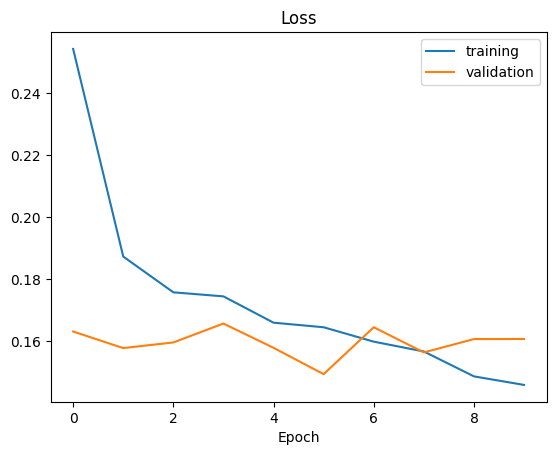

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [34]:
model.save('model_da.h5')

# Bibliografia


- Udacity [self-driving-car-sim Github Repository](https://github.com/udacity/self-driving-car-sim)
- [Easy way to use Kaggle datasets in Google Colab](https://www.kaggle.com/general/51898)
- Capítulo 10. Ranjan, S. y Senthamilarasu S.(2020). Applied Deep Learning and Computer Vision for Self-Driving Cars. Packt Publishing Ltd. [Link to an external site](https://learning.oreilly.com/library/view/applied-deep-learning/9781838646301/?sso_link=yes&sso_link_from=ITESLinks)

- Bojarski, M. et. al. (2016). End to End Learning for Self Driving Cars. Disponible en: https://arxiv.org/abs/1604.07316Links